In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [4]:
sleep_filepath = "/Users/cassini/OneDrive - Cassini AG/Persönliches/Study/Data Science classes/20231710 Levture/Sleep_health_and_lifestyle_dataset.csv"
sleep_data = pd.read_csv(sleep_filepath)

In [5]:
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


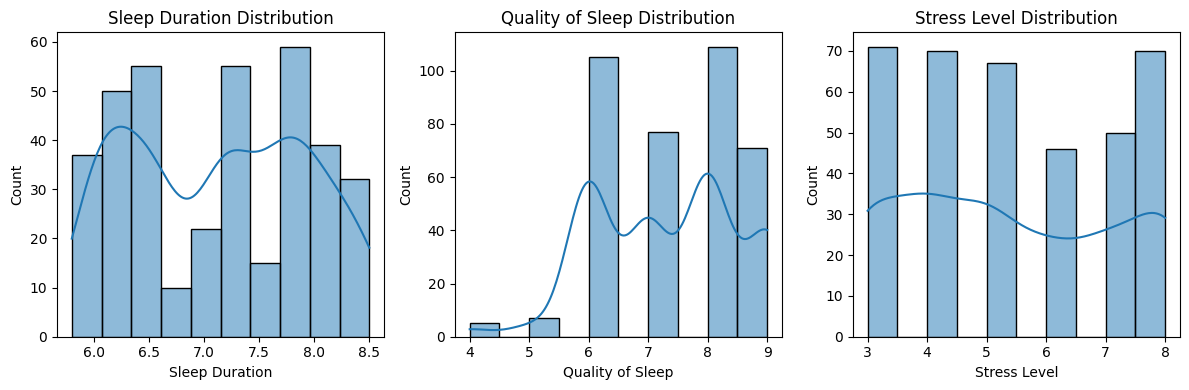

In [8]:
# How do Sleep Duration, Quality of Sleep and Stress Level correlate?
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(sleep_data['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration')

plt.subplot(1, 3, 2)
sns.histplot(sleep_data['Quality of Sleep'], kde=True)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')

plt.subplot(1, 3, 3)
sns.histplot(sleep_data['Stress Level'], kde=True)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')

plt.tight_layout()
plt.show()

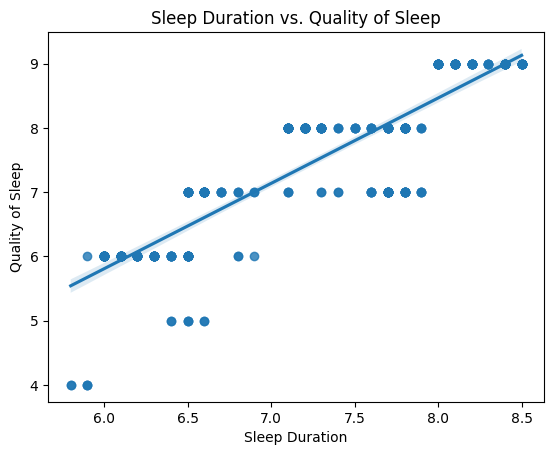

In [9]:
sns.regplot(x="Sleep Duration", y="Quality of Sleep", data=sleep_data)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

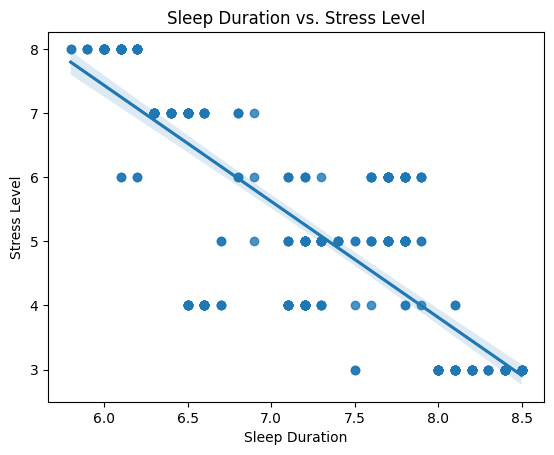

In [10]:
sns.regplot(x='Sleep Duration', y='Stress Level', data=sleep_data)
plt.title('Sleep Duration vs. Stress Level')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.show()

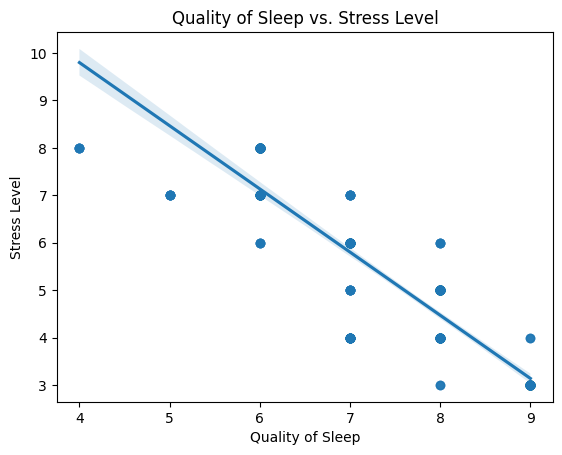

In [11]:
sns.regplot(x='Quality of Sleep', y='Stress Level', data=sleep_data)
plt.title('Quality of Sleep vs. Stress Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.show()

Text(0, 0.5, 'Sleep Duration in Hours')

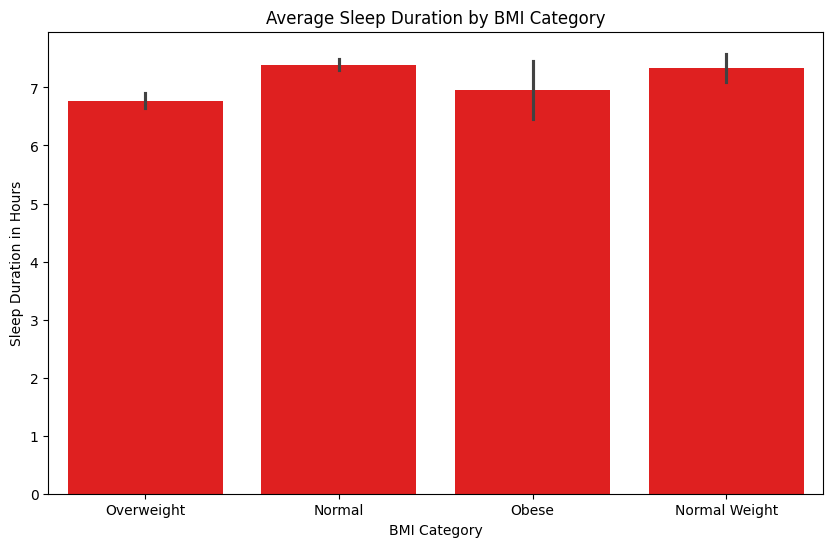

In [32]:
#Question: Does the BMI or Physical activity affect the sleep Duration?
plt.figure(figsize=(10,6))
plt.title("Average Sleep Duration by BMI Category")
sns.barplot(y=sleep_data["Sleep Duration"], x=sleep_data['BMI Category'], color="red")
plt.ylabel("Sleep Duration in Hours")

<Axes: title={'center': 'Distribution of Sleep Duration'}, xlabel='Sleep Duration', ylabel='Density'>

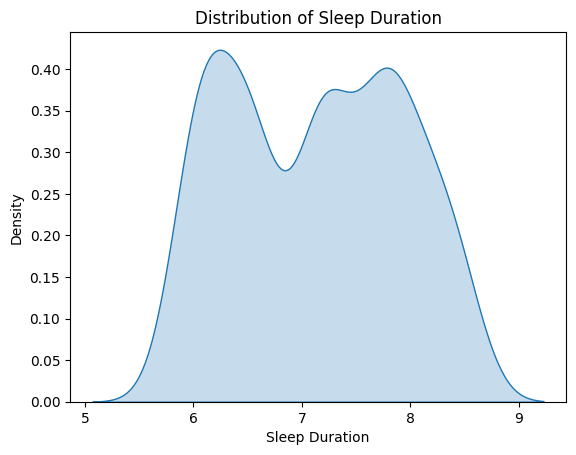

In [37]:
plt.title("Distribution of Sleep Duration")
sns.kdeplot(data=sleep_data['Sleep Duration'], fill=True)

<Axes: title={'center': 'Distribution of Sleep Duration, by BMI Category'}, xlabel='Sleep Duration', ylabel='Density'>

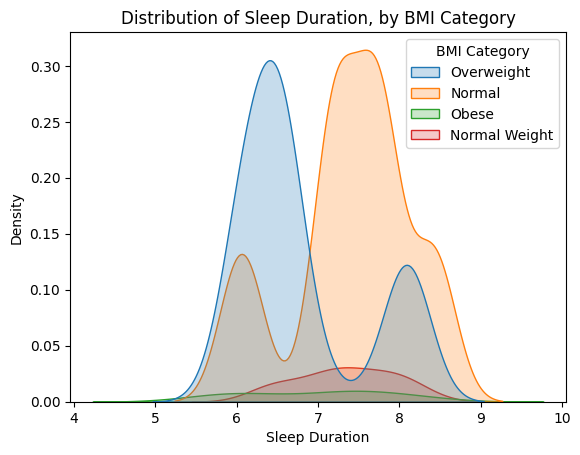

In [36]:
plt.title("Distribution of Sleep Duration, by BMI Category")
sns.kdeplot(data=sleep_data, x = 'Sleep Duration', hue = 'BMI Category', fill=True)

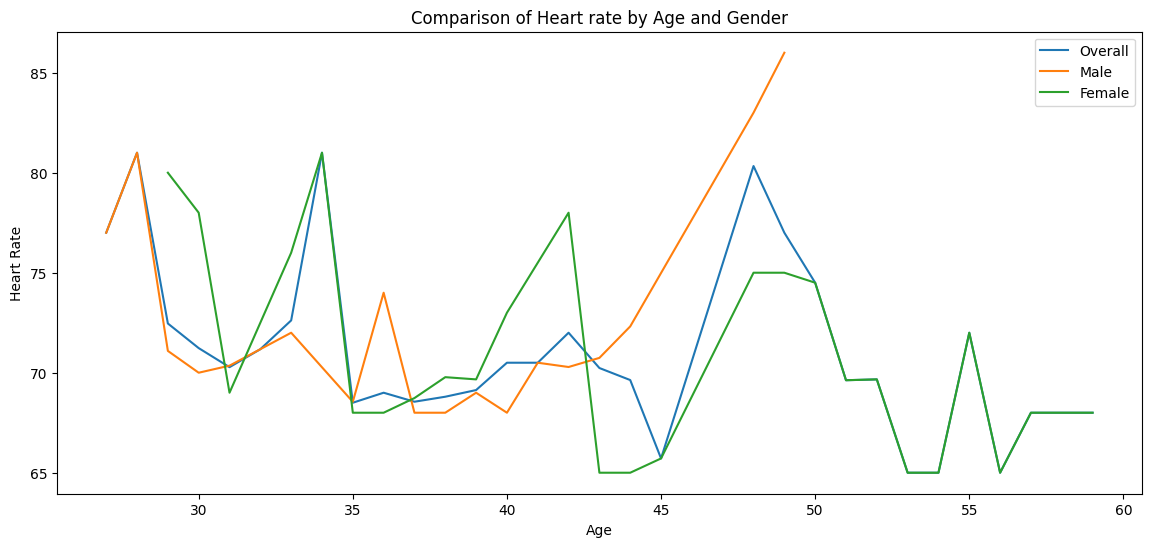

In [12]:
# Question 1: How does the average heart rate change as people get older?
plt.figure(figsize=(14, 6))
sns.lineplot(x='Age', y='Heart Rate', data=sleep_data, errorbar = None, label = 'Overall')
sns.lineplot(x='Age', y='Heart Rate', data=sleep_data[sleep_data['Gender'] == 'Male'],errorbar = None, label = 'Male')
sns.lineplot(x='Age', y='Heart Rate', data=sleep_data[sleep_data['Gender'] == 'Female'], errorbar = None, label = 'Female')
# sns.lineplot automatically gives us the mean Hert Rates 
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Comparison of Heart rate by Age and Gender')
plt.show()

              Occupation  Heart Rate
2               Engineer   67.190476
10               Teacher   67.225000
0             Accountant   68.864865
3                 Lawyer   69.638298
1                 Doctor   71.521127
5                  Nurse   72.000000
7            Salesperson   72.000000
4                Manager   75.000000
9      Software Engineer   75.500000
8              Scientist   78.500000
6   Sales Representative   85.000000


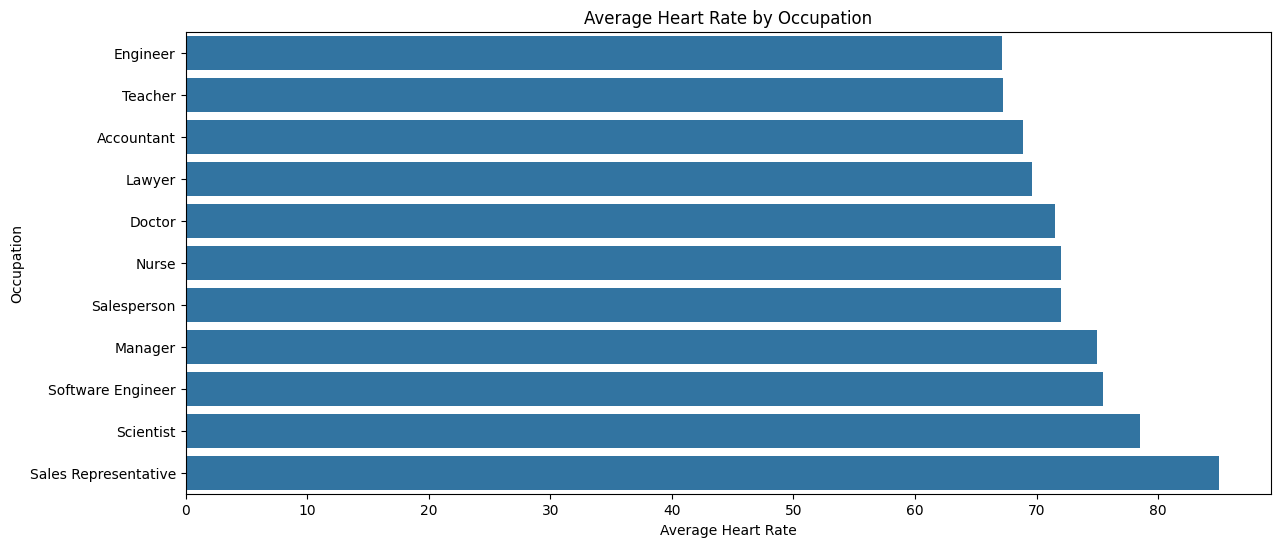

In [13]:
# What are the average heart rates for each occupation?
average_heart_rate = sleep_data.groupby('Occupation')['Heart Rate'].mean().reset_index()
# Here we reset_index to move 'Occupation' from the index into a regular column of the DataFrame

average_heart_rate =average_heart_rate.sort_values('Heart Rate')
print (average_heart_rate)
plt.figure(figsize=(14, 6))
sns.barplot(x = 'Heart Rate', y = 'Occupation', data = average_heart_rate,)
plt.title('Average Heart Rate by Occupation')
plt.xlabel('Average Heart Rate')
plt.ylabel('Occupation')
plt.show()

Text(0.5, 1.0, 'Influence of sleep duration on heart rate')

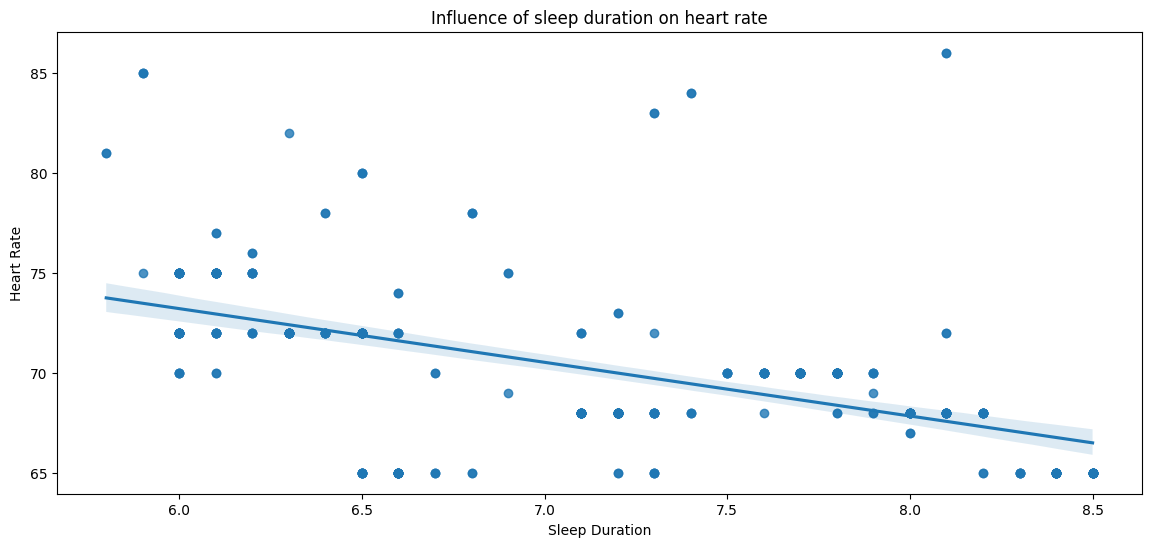

In [14]:
plt.figure(figsize=(14,6))
sns.regplot(x=sleep_data['Sleep Duration'], y= sleep_data['Heart Rate'])
plt.title('Influence of sleep duration on heart rate')
# It shows a negative correlation between sleep duration and heart rate, so individuals with longer sleep durations tend to have lower heart rates